In [69]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
df=pd.read_csv("/content/breast-cancer.csv")

In [21]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [24]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [25]:
df.drop(columns=['id'],inplace=True)

In [26]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0}).astype(int)

<Axes: >

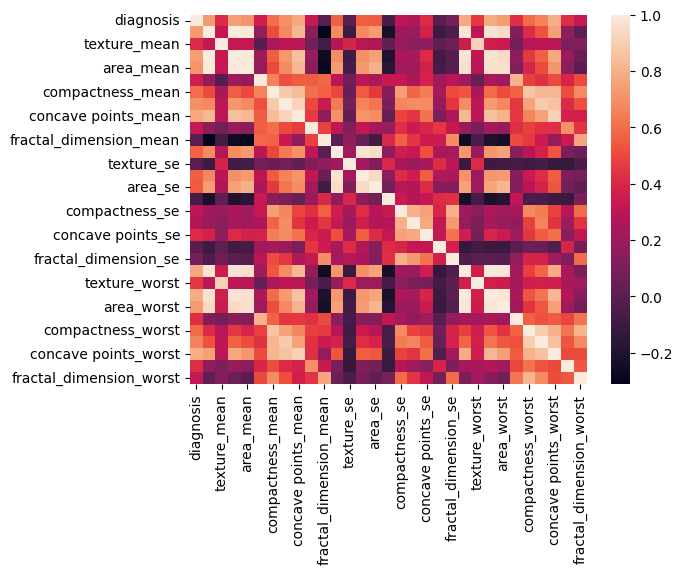

In [29]:
sns.heatmap(df.corr())

In [34]:
X=df.drop(["diagnosis"],axis=1)
y=df["diagnosis"]

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [40]:
model_1=LogisticRegression()
model_2=RandomForestClassifier(n_estimators=100)

In [41]:
model_1.fit(X_train,y_train)
model_2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [42]:
model_1_pred=model_1.predict(X_test)
model_2_pred=model_2.predict(X_test)

In [43]:
m1_score=accuracy_score(y_test,model_1_pred)
m2_score=accuracy_score(y_test,model_2_pred)

In [46]:
print("Logistic Regression:",m1_score)
print("RandomForest:",m2_score)

Logistic Regression: 0.956140350877193
RandomForest: 0.9649122807017544


In [47]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

In [52]:
grid_search_rf = GridSearchCV(estimator=model_2, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

In [53]:
grid_search_rf.fit(X, y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklea

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [54]:
# Print best parameters and best score
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best score found: ", grid_search_rf.best_score_)

Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Best score found:  0.9648657040832169


In [56]:
# Define the parameter grid
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Set up GridSearchCV
grid_search_log_reg = GridSearchCV(estimator=model_1, param_grid=param_grid_log_reg, cv=5, n_jobs=-1, verbose=2)

In [57]:
# Fit GridSearchCV
grid_search_log_reg.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [58]:
# Print best parameters and best score
print("Best parameters found: ", grid_search_log_reg.best_params_)
print("Best score found: ", grid_search_log_reg.best_score_)

Best parameters found:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score found:  0.9666200900481291


In [60]:
ann=Sequential()

In [65]:
ann.add(Dense(units=128,activation='relu',kernel_initializer='he_uniform',input_dim=30))
ann.add(Dense(units=62,activation='relu',kernel_initializer='he_uniform'))
ann.add(Dense(units=32,activation='relu',kernel_initializer='he_uniform'))
ann.add(Dense(units=16,activation='relu',kernel_initializer='he_uniform'))
ann.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))

In [66]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 62)                7998      
                                                                 
 dense_2 (Dense)             (None, 32)                2016      
                                                                 
 dense_3 (Dense)             (None, 128)               4224      
                                                                 
 dense_4 (Dense)             (None, 62)                7998      
                                                                 
 dense_5 (Dense)             (None, 32)                2016      
                                                                 
 dense_6 (Dense)             (None, 16)                5

In [67]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [68]:
model_history=ann.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
31/31 [==============================] - 4s 26ms/step - loss: 5.5764 - accuracy: 0.8289 - val_loss: 8.6944 - val_accuracy: 0.4371
Epoch 2/100
31/31 [==============================] - 0s 9ms/step - loss: 4.1765 - accuracy: 0.7434 - val_loss: 0.9479 - val_accuracy: 0.9007
Epoch 3/100
31/31 [==============================] - 0s 10ms/step - loss: 0.9304 - accuracy: 0.9112 - val_loss: 0.6108 - val_accuracy: 0.9007
Epoch 4/100
31/31 [==============================] - 0s 10ms/step - loss: 2.3960 - accuracy: 0.8487 - val_loss: 18.3770 - val_accuracy: 0.6556
Epoch 5/100
31/31 [==============================] - 0s 7ms/step - loss: 5.9926 - accuracy: 0.7533 - val_loss: 12.7235 - val_accuracy: 0.7351
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 2.7477 - accuracy: 0.8553 - val_loss: 0.7988 - val_accuracy: 0.8344
Epoch 7/100
31/31 [==============================] - 0s 6ms/step - loss: 0.4632 - accuracy: 0.8816 - val_loss: 1.6733 - val_accuracy: 0.5497
Epoch 8/

In [70]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model_2, file)

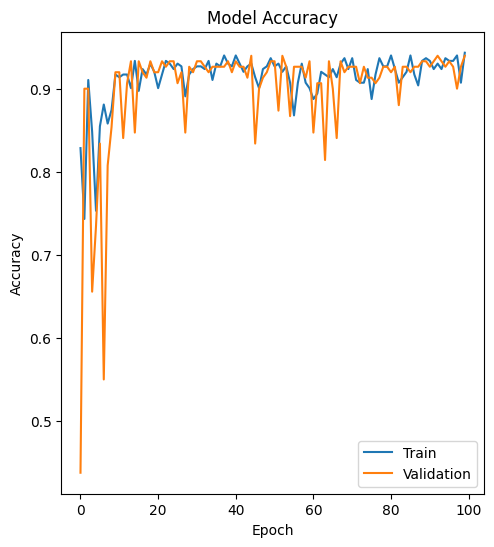

In [71]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

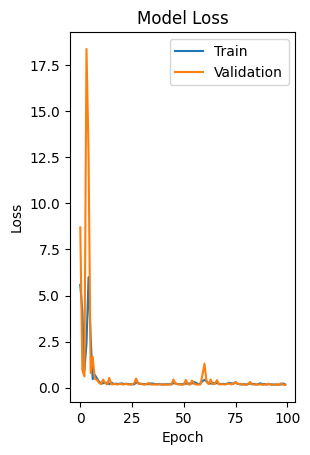

In [72]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()